In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/TAB_Betting_Data.csv')

df['DATE_DIM'] = pd.to_datetime(df['DATE_DIM'])

df.fillna(0, inplace=True)

daily_df = df.groupby('DATE_DIM').agg({
    'TOTAL_TURNOVER': 'sum',
    'FOB_RACING_TURNOVER': 'sum',
    'FOB_SPORT_TURNOVER': 'sum',
    'PARI_RACING_TURNOVER': 'sum',
    'PARI_SPORT_TURNOVER': 'sum',
}).reset_index()

print(daily_df)

      DATE_DIM  TOTAL_TURNOVER  FOB_RACING_TURNOVER  FOB_SPORT_TURNOVER  \
0   2021-01-01      3835763.01           1740348.55           160299.45   
1   2021-01-02      6165935.03           3329808.95           257613.55   
2   2021-01-03      2198013.19            930629.79           331455.71   
3   2021-01-04      1523612.17            586816.57           321698.43   
4   2021-01-05      1480832.82            602373.79           224912.71   
..         ...             ...                  ...                 ...   
725 2022-12-27      2413850.20           1144594.00           311997.79   
726 2022-12-28      3379823.57           1741946.50           259758.31   
727 2022-12-29      2862803.99           1491770.50           284268.77   
728 2022-12-30      3000204.42           1543413.50           304666.43   
729 2022-12-31      5807930.20           3503842.50           367773.25   

     PARI_RACING_TURNOVER  PARI_SPORT_TURNOVER  
0              1935115.01                  0.0  
1

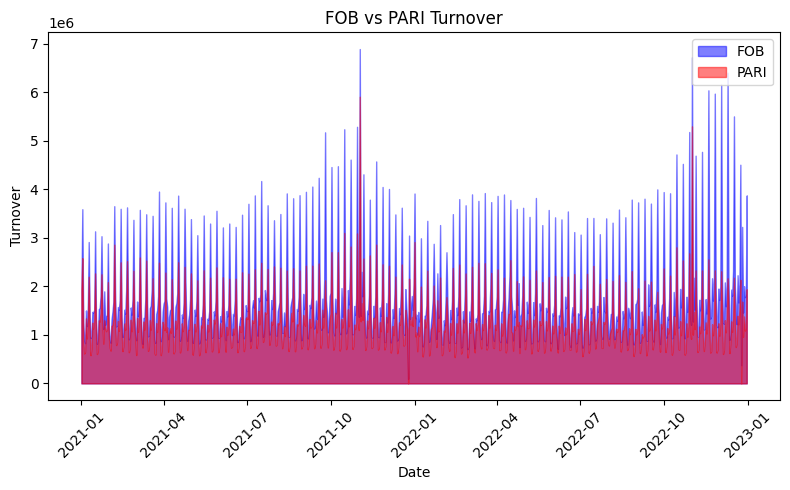

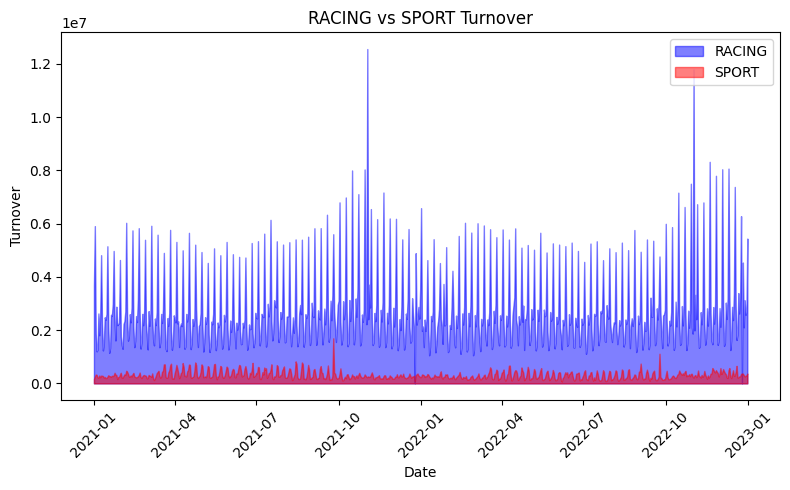

In [ ]:
import matplotlib.pyplot as plt
daily_df['FOB'] = daily_df['FOB_RACING_TURNOVER'] + daily_df['FOB_SPORT_TURNOVER']
daily_df['PARI'] = daily_df['PARI_RACING_TURNOVER'] + daily_df['PARI_SPORT_TURNOVER']

FOB_PARI_df = daily_df[['DATE_DIM','TOTAL_TURNOVER','FOB','PARI']]

daily_df['RACING'] = daily_df['FOB_RACING_TURNOVER'] + daily_df['PARI_RACING_TURNOVER']
daily_df['SPORT'] = daily_df['FOB_SPORT_TURNOVER'] + daily_df['PARI_SPORT_TURNOVER']
RACING_SPORT_df = daily_df[['DATE_DIM','TOTAL_TURNOVER','RACING','SPORT']]

# Plot for FOB_PARI_df
plt.figure(figsize=(8, 5))
plt.fill_between(FOB_PARI_df['DATE_DIM'], FOB_PARI_df['FOB'], label='FOB', color='blue', alpha=0.5)
plt.fill_between(FOB_PARI_df['DATE_DIM'], FOB_PARI_df['PARI'], label='PARI', color='red', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.title('FOB vs PARI Turnover')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for RACING_SPORT_df
plt.figure(figsize=(8, 5))
plt.fill_between(RACING_SPORT_df['DATE_DIM'], RACING_SPORT_df['RACING'], label='RACING', color='blue', alpha=0.5)
plt.fill_between(RACING_SPORT_df['DATE_DIM'], RACING_SPORT_df['SPORT'], label='SPORT', color='red', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Turnover')
plt.title('RACING vs SPORT Turnover')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

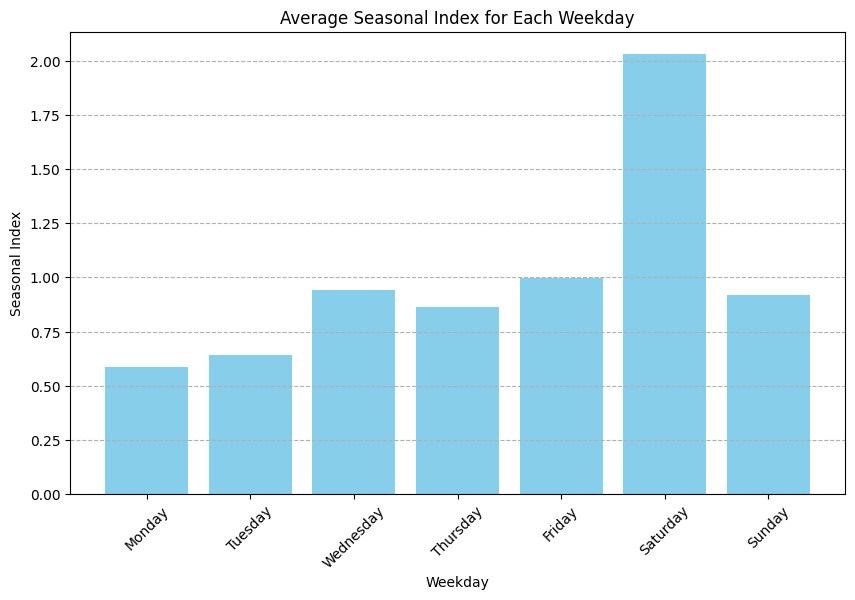

In [ ]:
# SEASONAL INDEX
import pandas as pd
daily_df['DATE_DIM'] = pd.to_datetime(daily_df['DATE_DIM'])

daily_df['WEEKDAY'] = daily_df['DATE_DIM'].dt.dayofweek

weekly_avg = daily_df.groupby('WEEKDAY')['TOTAL_TURNOVER'].mean()

# Calculate the overall average turnover
overall_avg = daily_df['TOTAL_TURNOVER'].mean()

# Calculate the seasonal index for each weekday
seasonal_index = weekly_avg / overall_avg
seasonal_index.index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

weekdays = seasonal_index.index
indices = seasonal_index.values

plt.figure(figsize=(10, 6))
plt.bar(weekdays, indices, color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Seasonal Index')
plt.title('Average Seasonal Index for Each Weekday')
plt.ylim(0, max(indices) + 0.1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

In [ ]:
daily_df.reset_index(inplace=True)

# Filter data for the year 2021
data_2021 = daily_df[daily_df['DATE_DIM'].dt.year == 2021]

# Find the date with the maximum turnover in 2021
max_turnover_date_2021 = data_2021.loc[data_2021['TOTAL_TURNOVER'].idxmax(), 'DATE_DIM']
max_turnover_value_2021 = data_2021['TOTAL_TURNOVER'].max()

# Find the date with the minimum turnover in 2021
min_turnover_date_2021 = data_2021.loc[data_2021['TOTAL_TURNOVER'].idxmin(), 'DATE_DIM']
min_turnover_value_2021 = data_2021['TOTAL_TURNOVER'].min()

print("For the year 2021:")
print(f"Date with maximum turnover: {max_turnover_date_2021}, Turnover: {max_turnover_value_2021}")
print(f"Date with minimum turnover: {min_turnover_date_2021}, Turnover: {min_turnover_value_2021}")

# Filter data for the year 2022
data_2022 = daily_df[daily_df['DATE_DIM'].dt.year == 2022]

# Find the date with the maximum turnover in 2022
max_turnover_date_2022 = data_2022.loc[data_2022['TOTAL_TURNOVER'].idxmax(), 'DATE_DIM']
max_turnover_value_2022 = data_2022['TOTAL_TURNOVER'].max()

# Find the date with the minimum turnover in 2022
min_turnover_date_2022 = data_2022.loc[data_2022['TOTAL_TURNOVER'].idxmin(), 'DATE_DIM']
min_turnover_value_2022 = data_2022['TOTAL_TURNOVER'].min()

print("\nFor the year 2022:")
print(f"Date with maximum turnover: {max_turnover_date_2022}, Turnover: {max_turnover_value_2022}")
print(f"Date with minimum turnover: {min_turnover_date_2022}, Turnover: {min_turnover_value_2022}")

For the year 2021:
Date with maximum turnover: 2021-11-02 00:00:00, Turnover: 12790451.92
Date with minimum turnover: 2021-12-25 00:00:00, Turnover: 93015.86

For the year 2022:
Date with maximum turnover: 2022-11-01 00:00:00, Turnover: 12011107.99
Date with minimum turnover: 2022-12-25 00:00:00, Turnover: 372355.49


In [2]:
# Forecasting with XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

data = daily_df

split_idx = int(len(data) * 0.80)
train_data = data.iloc[:split_idx].copy()
test_data = data.iloc[split_idx:].copy()

for df in [train_data, test_data]:
    df['Week'] = df['DATE_DIM'].dt.isocalendar().week
    df['DayOfWeek'] = df['DATE_DIM'].dt.dayofweek

# XGBoost
X_train = train_data[['Week', 'DayOfWeek']]
y_train = train_data['TOTAL_TURNOVER']
X_test = test_data[['Week', 'DayOfWeek']]
y_test = test_data['TOTAL_TURNOVER']

xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train, y_train)

xgb_forecast = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_forecast))
xgb_mape = mean_absolute_percentage_error(y_test, xgb_forecast)

print('Evaluation Metrics:')
print(f'XGBoost - RMSE: {xgb_rmse:.2f}, MAPE: {xgb_mape:.2f}%')

Evaluation Metrics:
XGBoost - RMSE: 886354.93, MAPE: 21.15%


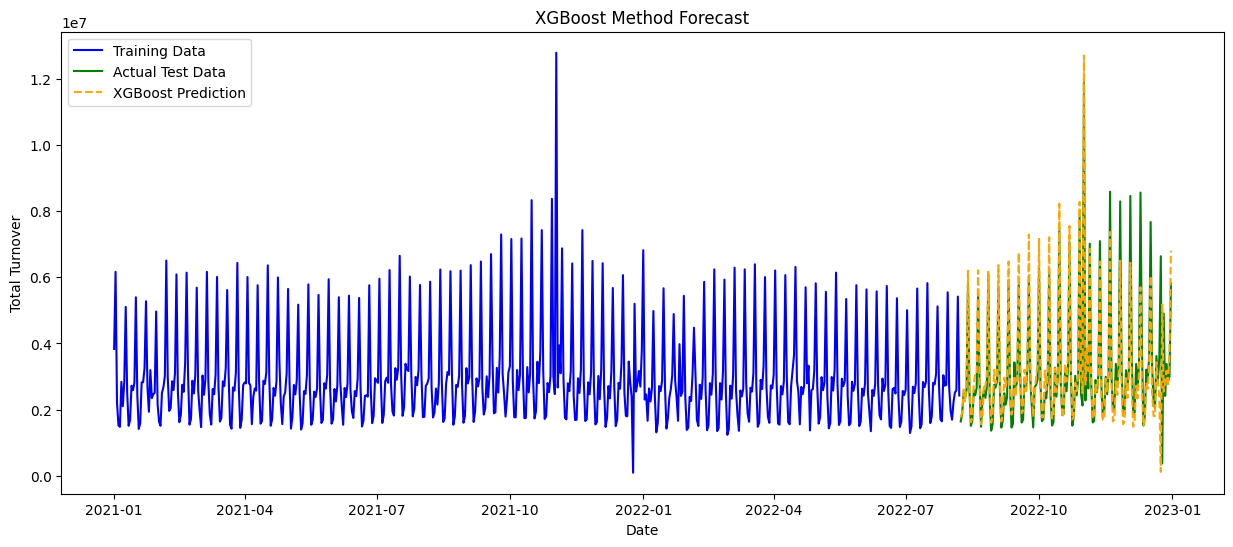

In [ ]:
plt.figure(figsize=(15, 6))

plt.plot(train_data['DATE_DIM'], train_data['TOTAL_TURNOVER'], label='Training Data', color='blue')
plt.plot(test_data['DATE_DIM'], test_data['TOTAL_TURNOVER'], label='Actual Test Data', color='green')
plt.plot(test_data['DATE_DIM'], xgb_forecast , label='XGBoost Prediction', color='orange', linestyle='--')
plt.title('XGBoost Method Forecast')
plt.xlabel('Date')
plt.ylabel('Total Turnover')
plt.legend()
plt.show()


Evaluation Metrics:
XGBoost (Grid Search) - RMSE: 732803.88, MAPE: 22.10%
{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.75}


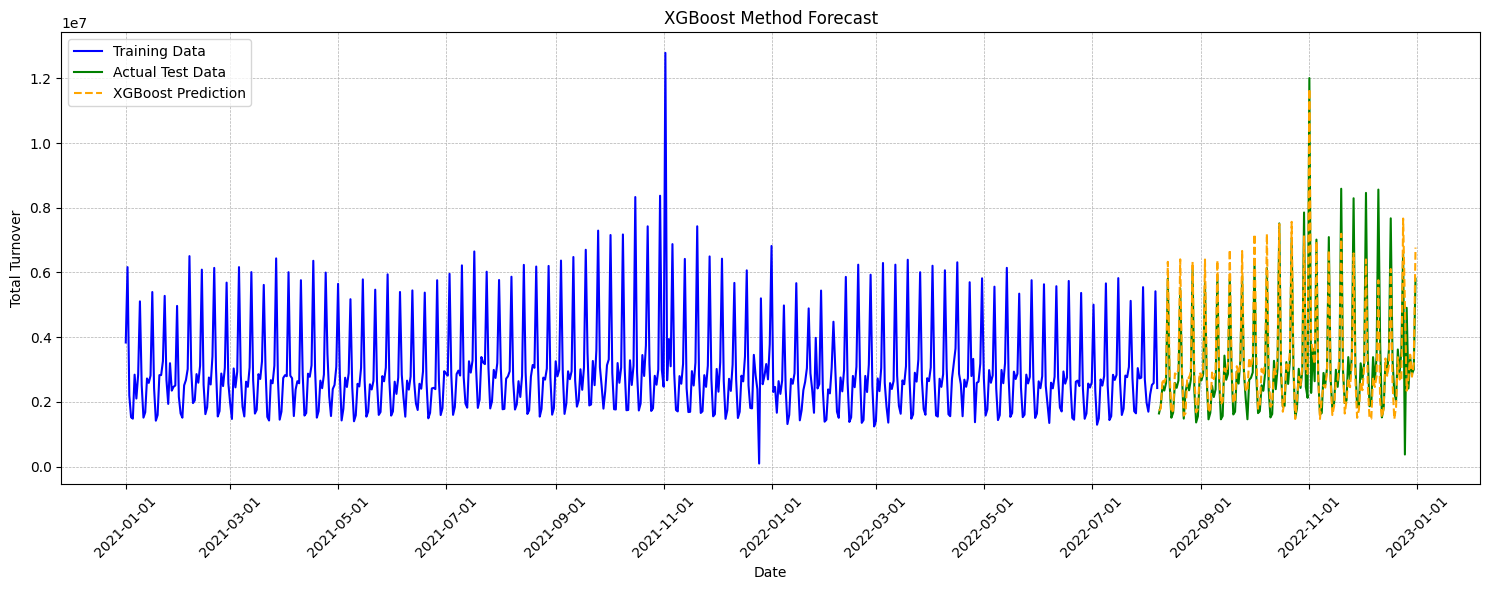

In [ ]:
# XGBoost with Random Search
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

data = daily_df

split_idx = int(len(data) * 0.8)
train_data = data.iloc[:split_idx].copy()
test_data = data.iloc[split_idx:].copy()

for df in [train_data, test_data]:
  df['Week'] = df['DATE_DIM'].dt.isocalendar().week
  df['DayOfWeek'] = df['DATE_DIM'].dt.dayofweek

# Separate for validation set within Random Search
X_train_cv, X_val_cv, y_train_cv, y_val_cv = train_test_split(train_data[['Week', 'DayOfWeek']], train_data['TOTAL_TURNOVER'], test_size=0.2)

xgb_model = XGBRegressor(n_estimators=100, objective='reg:squarederror')

param_grid = {
  'n_estimators': [100, 150, 175, 200],
  'max_depth': [3, 4, 5, 6, 7],
  'learning_rate': [0.75, 0.8, 1, 1.25],
}

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, cv=10, scoring=mean_squared_error, n_iter=100)
random_search.fit(X_train_cv, y_train_cv)

best_model = random_search.best_estimator_

X_test = test_data[['Week', 'DayOfWeek']]
y_test = test_data['TOTAL_TURNOVER']

xgb_forecast = best_model.predict(X_test[['Week', 'DayOfWeek']])

xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_forecast))
xgb_mape = mean_absolute_percentage_error(y_test, xgb_forecast)

print('Evaluation Metrics:')
print(f'XGBoost (Random Search) - RMSE: {xgb_rmse:.2f}, MAPE: {xgb_mape:.2f}%')
print(random_search.best_params_)

import matplotlib.dates as mdates

plt.figure(figsize=(15, 6))

plt.plot(train_data['DATE_DIM'], train_data['TOTAL_TURNOVER'], linestyle='-', label='Training Data', color='blue')

plt.plot(test_data['DATE_DIM'], test_data['TOTAL_TURNOVER'], linestyle='-', label='Actual Test Data', color='green')

plt.plot(test_data['DATE_DIM'], xgb_forecast, label='XGBoost Prediction', color='orange', linestyle='--')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.title('XGBoost Method Forecast')
plt.xlabel('Date')
plt.ylabel('Total Turnover')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()